In [31]:
import pandas as pd

## Reading and exploring the data

In [32]:
# Read the data from a CSV file from the `data/` folder (not for streamlit app)
df = pd.read_csv("data/open-meteo-subset.csv")

# Show the first 5 rows of the dataframe
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [33]:
# Show summary statistics of the dataframe
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [34]:
# Show info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


We can see that we need to convert time from *object* to *datetime*. 

In [35]:
df["time"] = pd.to_datetime(df["time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


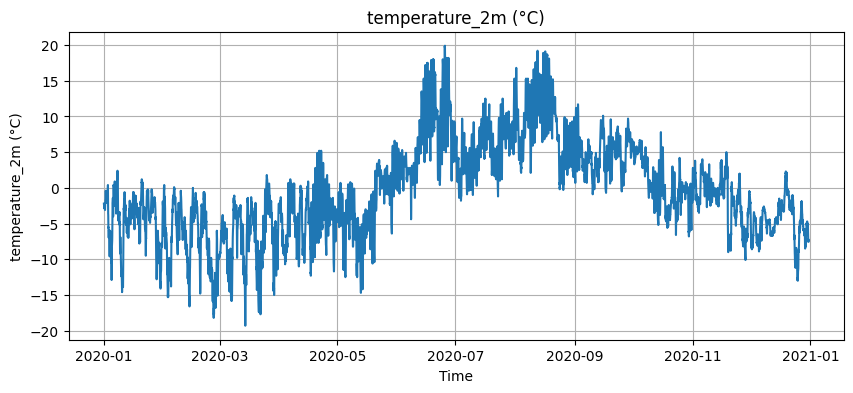

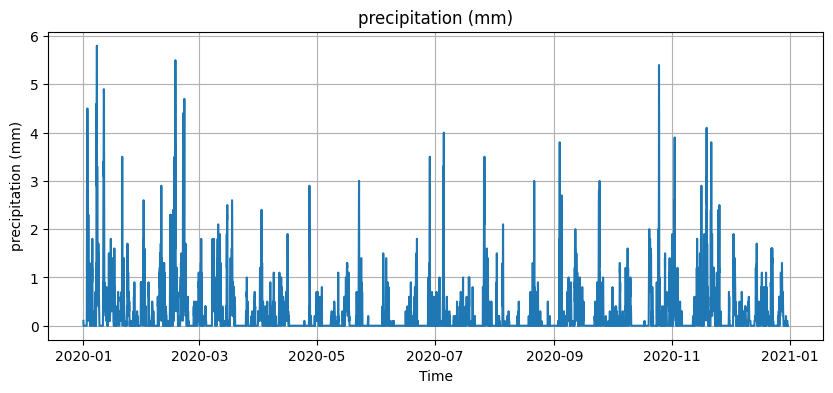

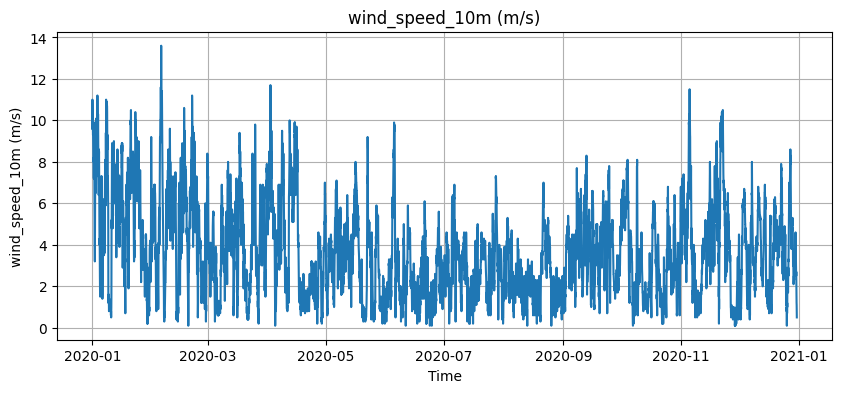

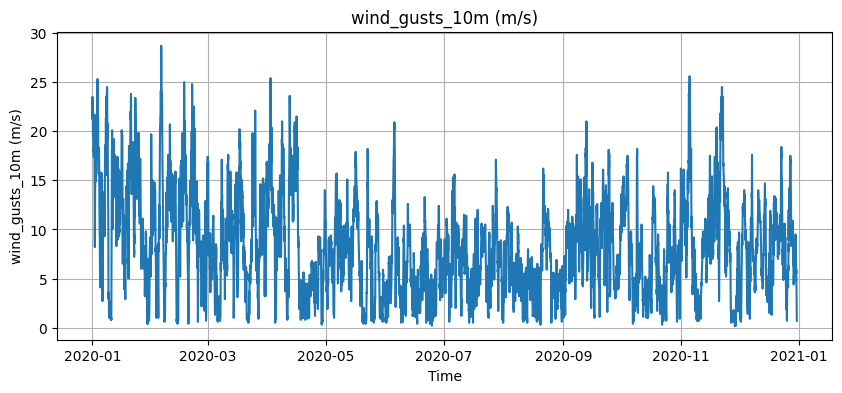

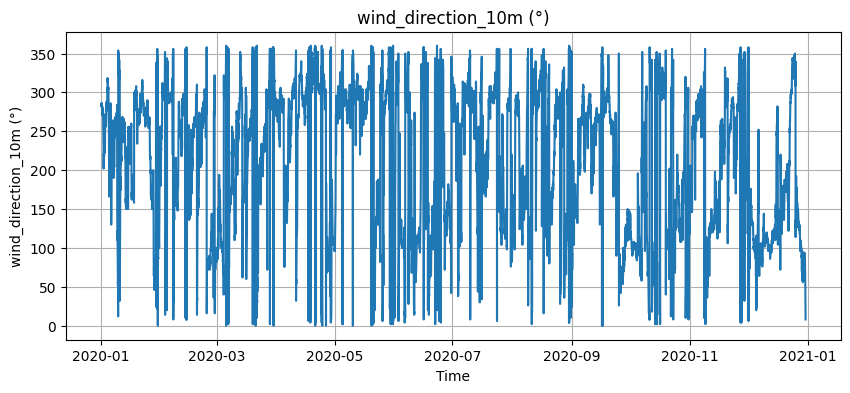

In [30]:
import matplotlib.pyplot as plt

for column in df.columns.drop("time"):
    plt.figure(figsize=(10,4))
    plt.plot(df["time"], df[column])
    plt.title(column)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

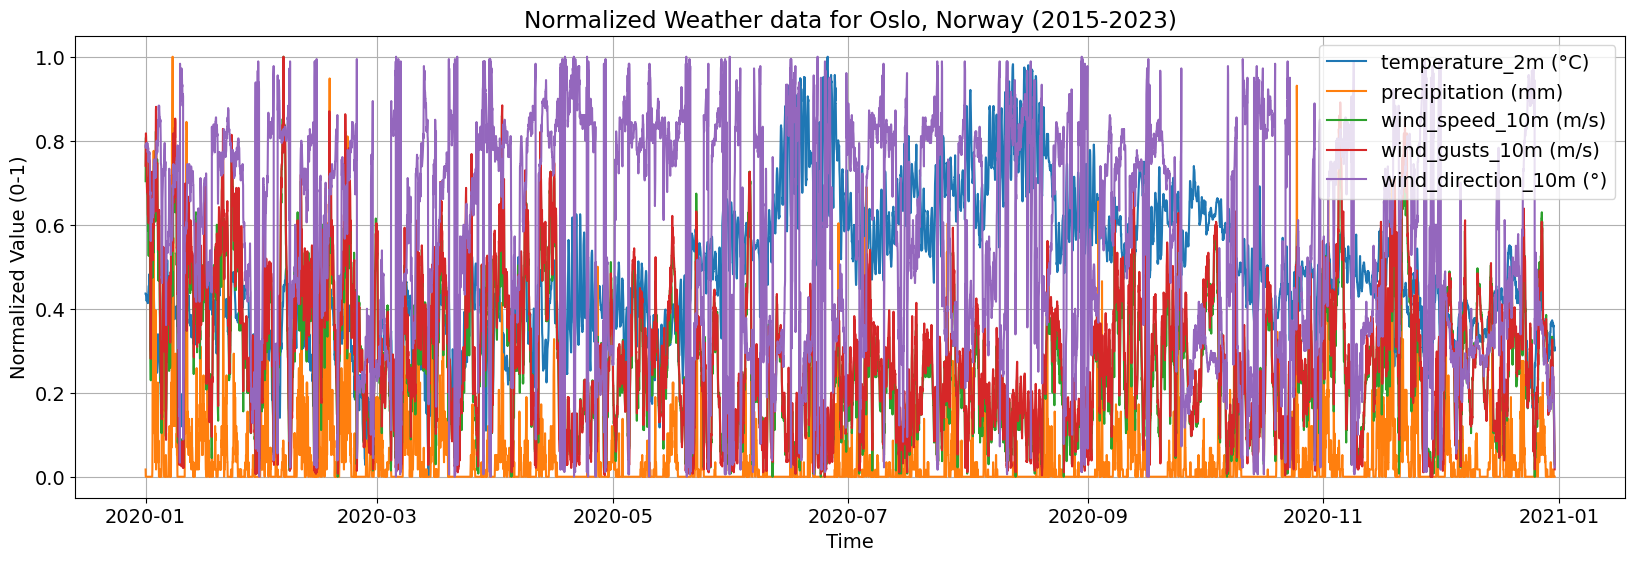

In [51]:

# As we can see from the plots above, the scales are very different. We can normalize the data to a 0-1 range for better comparison.
# Normalizing to 0-1 range
df_normalized = df.copy()
for column in df.columns.drop("time"):
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
# Plot normalized data
plt.figure(figsize=(20,6))
for column in df_normalized.columns.drop("time"):
    plt.plot(df_normalized["time"], df_normalized[column], label=column)
plt.rcParams.update({'font.size': 14})
plt.title("Normalized Weather data for Oslo, Norway (2015-2023)")
plt.xlabel("Time")
plt.ylabel("Normalized Value (0-1)")
plt.legend()
plt.grid(True)
plt.show()      


## Streamlit app

In [ ]:
import streamlit as st
import pandas as pd

# --- Cache data for speed ---
@st.cache_data
def load_data():
    df = pd.read_csv("data/open-meteo-subset.csv")  # <- updated path
    df["time"] = pd.to_datetime(df["time"])
    return df

df = load_data()

# --- Page navigation ---
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Home", "Table", "Plots", "About"])

# --- Home page ---
if page == "Home":
    st.title("IND320 Project – Weather Data")
    st.write("Welcome! This app shows data analysis and visualization of the provided CSV file.")
    st.write("Use the sidebar to navigate between pages.")

# --- Table page ---
elif page == "Table":
    st.title("Data Table")
    st.write("Here’s a preview of the dataset:")
    st.dataframe(df.head())

    st.write("Row-wise chart preview (first month):")
    first_month = df[df["time"].dt.month == df["time"].dt.month.min()]
    st.dataframe(first_month.set_index("time"))

# --- Plots page ---
elif page == "Plots":
    st.title("Data Visualization")

    # Column selector
    columns = list(df.columns.drop("time"))
    option = st.selectbox("Choose a column to plot", ["All"] + columns)

    # Month selector
    months = sorted(df["time"].dt.month.unique())
    month = st.select_slider("Select month", options=months, value=months[0])

    subset = df[df["time"].dt.month == month]

    if option == "All":
        st.line_chart(subset.set_index("time")[columns])
    else:
        st.line_chart(subset.set_index("time")[[option]])

# --- About page ---
elif page == "About":
    st.title("About this project")
    st.write("This is a compulsory assignment for IND320. The app is built with Streamlit and hosted via Streamlit Cloud.")